In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./ratings.csv')
df.shape

(100004, 4)

In [3]:
df['flag']=df['rating']>3

In [4]:
df0=df.copy()
df0.head()

,userId,movieId,rating,timestamp,flag
0,1,31,2.5,1260759144,False
1,1,1029,3.0,1260759179,False
2,1,1061,3.0,1260759182,False
3,1,1129,2.0,1260759185,False
4,1,1172,4.0,1260759205,True


In [5]:
df = df[['userId','movieId','flag']]
df.shape

(100004, 3)

In [6]:
df['flag']=df['flag'].map({True:1,False:0})

In [7]:
df.head()

,userId,movieId,flag
0,1,31,0
1,1,1029,0
2,1,1061,0
3,1,1129,0
4,1,1172,1


In [8]:
df.columns=['userID','codeID','flag']

In [9]:
df.head()

,userID,codeID,flag
0,1,31,0
1,1,1029,0
2,1,1061,0
3,1,1129,0
4,1,1172,1


In [11]:
# df

In [12]:
# df['codeID'].apply(str).apply(hash)

In [13]:
# df.to_csv('sample.csv',index=False)

___

In [14]:
len(df['userID'].unique()), len(df['codeID'].unique())

(671, 9066)

In [15]:
tdf = df.pivot(index='userID',columns='codeID',values='flag')
tdf.shape

(671, 9066)

In [16]:
tdf.head()

codeID,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
tdf.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [ 1., nan, nan, ..., nan, nan, nan],
       [ 1., nan, nan, ..., nan, nan, nan]])

In [24]:
map(str, tdf.values)[:3]

['[nan nan nan ... nan nan nan]',
 '[nan nan nan ... nan nan nan]',
 '[nan nan nan ... nan nan nan]']

In [27]:
pd.Series(map(hash, map(str, tdf.values)))

0      8456572498303353541
1      8456572498303353541
2      8456572498303353541
3      8456572498303353541
4      4512244085330229083
5      8456572498303353541
6     -2779844885655832418
7      8456572498303353541
8      -177164705903386053
9      8456572498303353541
10     8456572498303353541
11     8456572498303353541
12     -177164705903386053
13     8456572498303353541
14    -4430270973341047963
15     8456572498303353541
16     8456572498303353541
17     8456572498303353541
18      111118611821102238
19     -177164705903386053
20     8456572498303353541
21     8456572498303353541
22    -2779844885655832418
23     8456572498303353541
24    -3583215592075660418
25     -177164705903386053
26     8456572498303353541
27     8456572498303353541
28     8456572498303353541
29    -1648039159173868828
              ...         
641    8456572498303353541
642    8456572498303353541
643    8456572498303353541
644    8456572498303353541
645    -644092284434242907
646    -177164705903386053
6

In [17]:
# tdf[tdf.duplicated()]

In [66]:
from scipy import sparse

In [74]:
tdf.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [ 1., nan, nan, ..., nan, nan, nan],
       [ 1., nan, nan, ..., nan, nan, nan]])

In [73]:
sparse.csr_matrix(tdf.values)

<671x9066 sparse matrix of type '<type 'numpy.float64'>'
	with 6045388 stored elements in Compressed Sparse Row format>

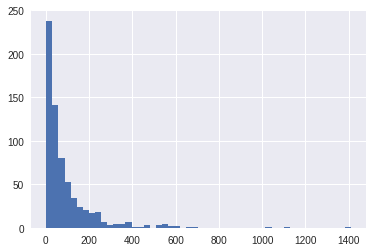

In [34]:
tdf.sum(1).hist(bins=50)

In [50]:
tdf.sum(1)

userID
1        4.0
2       34.0
3       29.0
4      171.0
5       93.0
6       24.0
7       39.0
8       95.0
9       31.0
10      28.0
11      31.0
12      18.0
13      38.0
14       5.0
15     545.0
16      27.0
17     265.0
18      19.0
19     199.0
20      61.0
21      67.0
22     114.0
23     551.0
24      12.0
25       8.0
26     114.0
27      18.0
28      43.0
29       8.0
30     704.0
       ...  
642     26.0
643     12.0
644     22.0
645     22.0
646    142.0
647    126.0
648    197.0
649     44.0
650     14.0
651     13.0
652    255.0
653     36.0
654    571.0
655     90.0
656    118.0
657     10.0
658     50.0
659     62.0
660     85.0
661     26.0
662     26.0
663     22.0
664    427.0
665    173.0
666     10.0
667     36.0
668     11.0
669     16.0
670     21.0
671     97.0
Length: 671, dtype: float64

In [36]:
df['codeID'].describe()

count    100004.000000
mean      12548.664363
std       26369.198969
min           1.000000
25%        1028.000000
50%        2406.500000
75%        5418.000000
max      163949.000000
Name: codeID, dtype: float64

In [42]:
pd.Series(df['codeID'].unique()).describe()

count      9066.000000
mean      30772.100044
std       40418.420801
min           1.000000
25%        2829.750000
50%        6248.000000
75%       55827.500000
max      163949.000000
dtype: float64

In [45]:
import numpy as np

In [47]:
np.random.choice(df['codeID'].unique(), size=20)

array([  1641,    393,   8629,   8491,  26086,   2296,    663,   1588,
        25764,   8533,   4981,   6187,   3268,   4237,    343,   3078,
         6643, 106002,    338,   3554])

In [44]:
df['codeID'].unique()

array([  31, 1029, 1061, ...,  129, 4736, 6425])

In [48]:
pd.Series(df['userID'].unique()).describe()

count    671.000000
mean     336.000000
std      193.845299
min        1.000000
25%      168.500000
50%      336.000000
75%      503.500000
max      671.000000
dtype: float64